In [ ]:
import bz2
import json

import ray

In [ ]:
import re
import string

import numpy as np
import spacy
from spacy.tokens import Span

newline_pattern = re.compile(r"\s*\n\s*")
punctuation_pattern = re.compile(r"[.,?!:;]*\.[.,?!:;]*")

punct_and_space = set(string.punctuation + string.whitespace)


def calculate_stats(batch: dict[str, np.ndarray]) -> dict[str, np.ndarray]:
    text = batch["text"]

    batch["words"] = np.array(
        [sum(1 for w in t.split() if w.replace("-", "").isalpha()) for t in text]
    )
    batch["newline"] = np.array([t.count("\n") for t in text])
    batch["newline_re"] = np.array([len(newline_pattern.findall(t)) for t in text])
    batch["punctuation"] = np.array([t.count(".") for t in text])
    batch["punctuation_re"] = np.array(
        [len(punctuation_pattern.findall(t)) for t in text]
    )
    batch["period"] = np.array([t.count(".") for t in text])
    batch["comma"] = np.array([t.count(",") for t in text])
    batch["question"] = np.array([t.count("?") for t in text])
    batch["exclamation"] = np.array([t.count("!") for t in text])
    batch["colon"] = np.array([t.count(":") for t in text])
    batch["semicolon"] = np.array([t.count(";") for t in text])
    batch["hyphen"] = np.array([t.count("-") for t in text])
    batch["not_alnum_or_ascii_punct_whitespace"] = np.array(
        [
            sum(1 for c in t if not c.isalnum() and c not in punct_and_space)
            for t in text
        ]
    )
    return batch


class StatCalculator:
    def __init__(self, spacy_model):
        self.nlp = spacy.load(spacy_model, exclude=["ner", "lemmatizer"])

    @staticmethod
    def normalized_dependency_distance(sentence: Span) -> float:
        d_root = sentence.root.i
        mDD = sum(
            [abs(token.i - token.head.i) for token in sentence if not token.is_punct]
        ) / len(sentence)
        nDD = np.log(mDD / np.sqrt(d_root * len(sentence)))
        return float(nDD)

    def __call__(self, batch: dict[str, np.ndarray]) -> dict[str, np.ndarray]:
        batch = calculate_stats(batch)

        spacy_docs = self.nlp.pipe(batch["text"])

        batch["spacy_tokens"] = np.array([len(doc) for doc in spacy_docs])
        batch["spacy_sents"] = np.array([len(list(doc.sents)) for doc in spacy_docs])
        batch["avg_normalized_dependency_distance"] = np.array(
            [
                np.mean(
                    [self.normalized_dependency_distance(sent) for sent in doc.sents]
                )
                for doc in spacy_docs
            ]
        )

        return batch


class StatCalculatorEn(StatCalculator):
    def __init__(self):
        super().__init__("en_core_web_sm")


class StatCalculatorDe(StatCalculator):
    def __init__(self):
        super().__init__("de_core_news_sm")


In [ ]:
from pathlib import Path

for dsf in Path("../data/prismai").glob("*.jsonl.bz2"):
    outpath = (dsf.parent / "stats") / dsf.with_suffix("").with_suffix("").with_suffix(
        ".stats.jsonl.bz2"
    ).name

    ds = (
        ray.data.from_items(
            [
                sample
                for line in bz2.open(dsf).readlines()
                for sample in json.loads(line)["samples"]
            ]
        )
        .map_batches(calculate_stats)
        .drop_columns(["text"])
        .to_pandas()
        .to_json(outpath, orient="records", lines=True, compression="bz2")
    )

2025-08-06 09:20:40,843	INFO logging.py:290 -- Registered dataset logger for dataset dataset_32_0
2025-08-06 09:20:40,846	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_32_0. Full logs are in /tmp/ray/session_2025-08-06_08-58-18_621020_5236/logs/ray-data
2025-08-06 09:20:40,846	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_32_0: InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(calculate_stats)->MapBatches(drop_columns)]


Running 0: 0.00 row [00:00, ? row/s]

- MapBatches(calculate_stats)->MapBatches(drop_columns) 1: 0.00 row [00:00, ? row/s]

2025-08-06 09:20:42,837	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_32_0 execution finished in 1.99 seconds
2025-08-06 09:20:52,888	INFO logging.py:290 -- Registered dataset logger for dataset dataset_35_0
2025-08-06 09:20:52,890	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_35_0. Full logs are in /tmp/ray/session_2025-08-06_08-58-18_621020_5236/logs/ray-data
2025-08-06 09:20:52,891	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_35_0: InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(calculate_stats)->MapBatches(drop_columns)]


Running 0: 0.00 row [00:00, ? row/s]

- MapBatches(calculate_stats)->MapBatches(drop_columns) 1: 0.00 row [00:00, ? row/s]

2025-08-06 09:20:54,940	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_35_0 execution finished in 2.05 seconds
2025-08-06 09:21:06,719	INFO logging.py:290 -- Registered dataset logger for dataset dataset_38_0
2025-08-06 09:21:06,721	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_38_0. Full logs are in /tmp/ray/session_2025-08-06_08-58-18_621020_5236/logs/ray-data
2025-08-06 09:21:06,722	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_38_0: InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(calculate_stats)->MapBatches(drop_columns)]


Running 0: 0.00 row [00:00, ? row/s]

- MapBatches(calculate_stats)->MapBatches(drop_columns) 1: 0.00 row [00:00, ? row/s]

2025-08-06 09:21:08,862	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_38_0 execution finished in 2.14 seconds
2025-08-06 09:21:31,367	INFO logging.py:290 -- Registered dataset logger for dataset dataset_41_0
2025-08-06 09:21:31,369	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_41_0. Full logs are in /tmp/ray/session_2025-08-06_08-58-18_621020_5236/logs/ray-data
2025-08-06 09:21:31,370	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_41_0: InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(calculate_stats)->MapBatches(drop_columns)]


Running 0: 0.00 row [00:00, ? row/s]

- MapBatches(calculate_stats)->MapBatches(drop_columns) 1: 0.00 row [00:00, ? row/s]

2025-08-06 09:21:35,019	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_41_0 execution finished in 3.65 seconds
2025-08-06 09:21:41,926	INFO logging.py:290 -- Registered dataset logger for dataset dataset_44_0
2025-08-06 09:21:41,928	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_44_0. Full logs are in /tmp/ray/session_2025-08-06_08-58-18_621020_5236/logs/ray-data
2025-08-06 09:21:41,929	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_44_0: InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(calculate_stats)->MapBatches(drop_columns)]


Running 0: 0.00 row [00:00, ? row/s]

- MapBatches(calculate_stats)->MapBatches(drop_columns) 1: 0.00 row [00:00, ? row/s]

2025-08-06 09:21:43,931	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_44_0 execution finished in 2.00 seconds
2025-08-06 09:22:17,107	INFO logging.py:290 -- Registered dataset logger for dataset dataset_47_0
2025-08-06 09:22:17,110	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_47_0. Full logs are in /tmp/ray/session_2025-08-06_08-58-18_621020_5236/logs/ray-data
2025-08-06 09:22:17,110	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_47_0: InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(calculate_stats)->MapBatches(drop_columns)]


Running 0: 0.00 row [00:00, ? row/s]

- MapBatches(calculate_stats)->MapBatches(drop_columns) 1: 0.00 row [00:00, ? row/s]

2025-08-06 09:22:22,218	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_47_0 execution finished in 5.10 seconds
2025-08-06 09:22:33,354	INFO logging.py:290 -- Registered dataset logger for dataset dataset_50_0
2025-08-06 09:22:33,357	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_50_0. Full logs are in /tmp/ray/session_2025-08-06_08-58-18_621020_5236/logs/ray-data
2025-08-06 09:22:33,357	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_50_0: InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(calculate_stats)->MapBatches(drop_columns)]


Running 0: 0.00 row [00:00, ? row/s]

- MapBatches(calculate_stats)->MapBatches(drop_columns) 1: 0.00 row [00:00, ? row/s]

2025-08-06 09:22:35,572	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_50_0 execution finished in 2.21 seconds
2025-08-06 09:22:47,201	INFO logging.py:290 -- Registered dataset logger for dataset dataset_53_0
2025-08-06 09:22:47,203	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_53_0. Full logs are in /tmp/ray/session_2025-08-06_08-58-18_621020_5236/logs/ray-data
2025-08-06 09:22:47,204	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_53_0: InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(calculate_stats)->MapBatches(drop_columns)]


Running 0: 0.00 row [00:00, ? row/s]

- MapBatches(calculate_stats)->MapBatches(drop_columns) 1: 0.00 row [00:00, ? row/s]

2025-08-06 09:22:49,387	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_53_0 execution finished in 2.18 seconds
2025-08-06 09:23:06,893	INFO logging.py:290 -- Registered dataset logger for dataset dataset_56_0
2025-08-06 09:23:06,896	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_56_0. Full logs are in /tmp/ray/session_2025-08-06_08-58-18_621020_5236/logs/ray-data
2025-08-06 09:23:06,897	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_56_0: InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(calculate_stats)->MapBatches(drop_columns)]


Running 0: 0.00 row [00:00, ? row/s]

- MapBatches(calculate_stats)->MapBatches(drop_columns) 1: 0.00 row [00:00, ? row/s]

2025-08-06 09:23:09,174	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_56_0 execution finished in 2.27 seconds
2025-08-06 09:25:17,416	INFO logging.py:290 -- Registered dataset logger for dataset dataset_59_0
2025-08-06 09:25:17,418	INFO streaming_executor.py:117 -- Starting execution of Dataset dataset_59_0. Full logs are in /tmp/ray/session_2025-08-06_08-58-18_621020_5236/logs/ray-data
2025-08-06 09:25:17,418	INFO streaming_executor.py:118 -- Execution plan of Dataset dataset_59_0: InputDataBuffer[Input] -> TaskPoolMapOperator[MapBatches(calculate_stats)->MapBatches(drop_columns)]


Running 0: 0.00 row [00:00, ? row/s]

- MapBatches(calculate_stats)->MapBatches(drop_columns) 1: 0.00 row [00:00, ? row/s]

2025-08-06 09:25:38,251	INFO streaming_executor.py:220 -- ✔️  Dataset dataset_59_0 execution finished in 20.83 seconds


In [107]:
from pathlib import Path

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

ALL_FEATURES = (
    "label",
    "words",
    # "newline",
    # "newline_re",
    "punctuation",
    "punctuation_re",
    "period",
    "comma",
    "question",
    "exclamation",
    "colon",
    "semicolon",
    "hyphen",
    "not_alnum_or_ascii_punct_whitespace",
)


def train_stats_model(
    ds: pd.DataFrame,
    features: tuple[str, ...] = ALL_FEATURES,
    agents: tuple[str, ...] | None = None,
    matched: bool = False,
    seed: int = 42,
):
    if agents:
        ds = ds[ds["agent"].isin(set(agents) | {"human"})]

    if matched:
        ds = ds.groupby("id_source").agg(list)
        ds = ds[ds["agent"].apply(lambda x: len(x) > 1)]
        ds = ds.explode(ds.columns.tolist())

    ds_features = ds.reset_index()[list(features)]

    X = ds_features.drop(columns=["label"]).to_numpy().astype(np.float32)
    y = ds_features["label"].to_numpy().astype(np.int32)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    print(f"Training\n  Accuracy: {model.score(X_train, y_train):.4f}")
    a = model.score(X_test, y_test)
    preds = model.predict(X_test)
    p, r, f1, _s = precision_recall_fscore_support(y_test, preds, average="weighted")

    # If dataset is matched, we have an equal number of samples for each class, so macro F1 is the same as weighted F1
    f1_macro = f1
    if not matched:
        _p, _r, f1_macro, _s = precision_recall_fscore_support(
            y_test, preds, average="macro"
        )

    # Recall on positive predictions is equal to TPR and conversely equal to TNR for negative predictions
    _p, (tnr, tpr), _f1, _s = precision_recall_fscore_support(
        y_test, preds, average=None
    )  # type: ignore

    print(
        f"""Test
  Accuracy:  {a:.4f}
  Precision: {p:.4f}
  Recall:    {r:.4f}
  F1-score:  {f1:.4f}
  F1-macro:  {f1_macro:.4f}
  TNR:       {tnr:.4f}
  TPR:       {tpr:.4f}
"""
    )

In [ ]:
dataframes = {
    path.stem.replace("prismai-", "").replace(
        "-fulltext.stats.jsonl", " (fulltext)"
    ): pd.read_json(path, compression="bz2", lines=True)
    for path in list(sorted(Path("../data/prismai/stats").glob("*.jsonl.bz2")))
}

In [108]:
for name, ds in dataframes.items():
    print(name)
    train_stats_model(
        ds,
        agents=("gpt-4o-mini",),
        matched=True,
    )

arxiv_papers(fulltext).stats.jsonl
Training
  Accuracy: 0.9974
Test
  Accuracy:  0.9976
  Precision: 0.9976
  Recall:    0.9976
  F1-score:  0.9976
  F1-macro:  0.9976
  TNR:       0.9958
  TPR:       0.9993

blog_authorship_corpus(fulltext).stats.jsonl
Training
  Accuracy: 0.8731
Test
  Accuracy:  0.8771
  Precision: 0.8774
  Recall:    0.8771
  F1-score:  0.8771
  F1-macro:  0.8771
  TNR:       0.8897
  TPR:       0.8645

bundestag(fulltext).stats.jsonl
Training
  Accuracy: 0.9563
Test
  Accuracy:  0.9572
  Precision: 0.9577
  Recall:    0.9572
  F1-score:  0.9572
  F1-macro:  0.9572
  TNR:       0.9409
  TPR:       0.9736

cnn_news(fulltext).stats.jsonl
Training
  Accuracy: 0.8920
Test
  Accuracy:  0.8794
  Precision: 0.8806
  Recall:    0.8794
  F1-score:  0.8793
  F1-macro:  0.8793
  TNR:       0.8515
  TPR:       0.9073

euro_court_cases(fulltext).stats.jsonl
Training
  Accuracy: 0.9478
Test
  Accuracy:  0.9415
  Precision: 0.9417
  Recall:    0.9415
  F1-score:  0.9415
  F1-macr

/nvme/projects/PrismAI/PrismAI/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training
  Accuracy: 0.9840
Test
  Accuracy:  0.9781
  Precision: 0.9790
  Recall:    0.9781
  F1-score:  0.9781
  F1-macro:  0.9781
  TNR:       0.9562
  TPR:       1.0000

house_of_commons(fulltext).stats.jsonl
Training
  Accuracy: 0.8729
Test
  Accuracy:  0.8725
  Precision: 0.8769
  Recall:    0.8725
  F1-score:  0.8722
  F1-macro:  0.8722
  TNR:       0.8189
  TPR:       0.9262

spiegel_articles(fulltext).stats.jsonl
Training
  Accuracy: 0.8644
Test
  Accuracy:  0.8613
  Precision: 0.8621
  Recall:    0.8613
  F1-score:  0.8612
  F1-macro:  0.8612
  TNR:       0.8380
  TPR:       0.8845

student_essays(fulltext).stats.jsonl
Training
  Accuracy: 0.9001
Test
  Accuracy:  0.9054
  Precision: 0.9055
  Recall:    0.9054
  F1-score:  0.9054
  F1-macro:  0.9054
  TNR:       0.9002
  TPR:       0.9106



In [101]:
ds = pd.read_json(
    "../data/prismai/stats/prismai-student_essays-fulltext.stats.jsonl.bz2",
    compression="bz2",
    lines=True,
)
agents = list(sorted(ds["agent"].unique()))
agents.remove("human")
for agent in agents:
    print(f"{agent}")
    train_stats_model(
        ds[ds["agent"].isin({"human", agent})],
        features=(
            "label",
            "words",
            # "newline",
            # "newline_re",
            "punctuation",
            "punctuation_re",
            "period",
            "comma",
            "question",
            "exclamation",
            "colon",
            "semicolon",
            "hyphen",
            # "not_alnum_or_ascii_punct_whitespace",
        ),
        matched=True,
    )
    print()

deepseek-r1_1.5b
Training
  Accuracy: 0.9396
Test
  Accuracy:  0.9333
  Precision: 0.9353
  Recall:    0.9333
  F1-score:  0.9333
  F1-macro:  0.9333
  TNR:       0.9667
  TPR:       0.9000


deepseek-r1_32b
Training
  Accuracy: 0.8714
Test
  Accuracy:  0.8523
  Precision: 0.8614
  Recall:    0.8523
  F1-score:  0.8513
  F1-macro:  0.8513
  TNR:       0.9318
  TPR:       0.7727


gemma2_9b
Training
  Accuracy: 0.8916
Test
  Accuracy:  0.8900
  Precision: 0.8903
  Recall:    0.8900
  F1-score:  0.8899
  F1-macro:  0.8899
  TNR:       0.9045
  TPR:       0.8755


gpt-4-turbo
Training
  Accuracy: 0.8562
Test
  Accuracy:  0.7500
  Precision: 0.7604
  Recall:    0.7500
  F1-score:  0.7475
  F1-macro:  0.7475
  TNR:       0.6500
  TPR:       0.8500


gpt-4o-mini
Training
  Accuracy: 0.8996
Test
  Accuracy:  0.9050
  Precision: 0.9051
  Recall:    0.9050
  F1-score:  0.9050
  F1-macro:  0.9050
  TNR:       0.8997
  TPR:       0.9103


nemotron
Training
  Accuracy: 0.9609
Test
  Accuracy:  0.9

In [82]:
_ds = ds
_ds = _ds.groupby("id_source").agg(list)
_ds = _ds[_ds["agent"].apply(lambda x: len(x) > 1)]
_ds.head()

,agent,label,id_sample,words,newline,newline_re,punctuation,punctuation_re,period,comma,question,exclamation,colon,semicolon,hyphen,not_alnum_or_ascii_punct_whitespace
id_source,,,,,,,,,,,,,,,,
00028832-98f7-41f7-bd09-60586094a2c1,"[human, gpt-4o-mini]","[0, 1]","[00028832-98f7-41f7-bd09-60586094a2c1, aa54e58...","[688, 658]","[10, 16]","[5, 8]","[30, 36]","[30, 36]","[30, 36]","[55, 49]","[0, 0]","[0, 0]","[0, 1]","[0, 1]","[1, 5]","[2, 3]"
00029b60-420e-4c47-b1af-b09939261f11,"[human, gpt-4o-mini]","[0, 1]","[00029b60-420e-4c47-b1af-b09939261f11, 953c75e...","[277, 228]","[6, 10]","[3, 5]","[15, 13]","[15, 13]","[15, 13]","[9, 21]","[1, 5]","[0, 3]","[0, 1]","[0, 1]","[0, 0]","[0, 18]"
00052fb4-17e4-4284-bb4a-963a4e073b51,"[human, gpt-4o-mini]","[0, 1]","[00052fb4-17e4-4284-bb4a-963a4e073b51, d58122f...","[474, 467]","[6, 12]","[3, 6]","[23, 30]","[23, 30]","[23, 30]","[18, 37]","[0, 2]","[2, 1]","[0, 1]","[0, 1]","[4, 4]","[36, 6]"
0006ab4f-916d-47b2-8515-ae918436bb1a,"[human, gpt-4o-mini]","[0, 1]","[0006ab4f-916d-47b2-8515-ae918436bb1a, 8d6dd81...","[335, 278]","[8, 6]","[4, 3]","[23, 13]","[21, 13]","[23, 13]","[15, 14]","[2, 10]","[1, 7]","[0, 0]","[0, 0]","[1, 2]","[14, 27]"
000969f5-03cb-4cd9-9756-87127ed3880d,"[human, gpt-4o-mini]","[0, 1]","[000969f5-03cb-4cd9-9756-87127ed3880d, b5550f4...","[335, 301]","[4, 8]","[2, 4]","[20, 21]","[20, 21]","[20, 21]","[6, 22]","[0, 0]","[0, 0]","[3, 0]","[0, 1]","[0, 3]","[1, 11]"


In [ ]:
from pathlib import Path

import pandas as pd

for path in Path("../data/prismai/stats").glob("*.jsonl.bz2"):
    ds = pd.read_json(path, compression="bz2", lines=True).set_index("agent")
    ds = (
        ds[
            [
                "words",
                # "newline",
                # "newline_re",
                # "punctuation",
                "punctuation_re",
            ]
        ]
        .groupby("agent")
        .aggregate(
            [
                "median",
                "mean",
                "std",
                # "min",
                # "max",
            ]
        )
        # [
        #     ["words", "newline", "newline_re", "punctuation", "punctuation_re"]
        # ]
    )
    ds.to_csv(path.with_suffix("").with_suffix(".csv"), index=True)
    print(
        path.stem,
        "\n",
        "\n".join(ds.to_csv(float_format="%.1f", sep="|", index=True).splitlines()),
    )

prismai-gutenberg_de-fulltext.stats.jsonl 
 |words|words|words|punctuation_re|punctuation_re|punctuation_re
|median|mean|std|median|mean|std
agent||||||
deepseek-r1_1.5b|315.0|408.4|377.2|20.0|32.1|38.3
deepseek-r1_32b|708.0|708.0|167.2|53.0|51.0|16.2
gemma2_9b|404.0|399.7|122.0|24.5|25.2|9.2
gpt-4o-mini|36.0|252.8|314.3|2.0|15.5|21.5
human|31109.0|42310.7|42748.1|1950.0|3425.8|7085.8
o3-mini|2336.0|2336.0|302.6|86.5|86.5|29.0
prismai-bundestag-fulltext.stats.jsonl 
 |words|words|words|punctuation_re|punctuation_re|punctuation_re
|median|mean|std|median|mean|std
agent||||||
deepseek-r1_1.5b|218.0|281.9|452.7|15.0|20.5|28.6
deepseek-r1_32b|370.0|402.7|605.8|22.0|25.2|42.2
gemma2_9b|340.0|320.4|119.1|19.0|18.4|8.2
gpt-4-turbo|409.0|400.2|65.2|25.0|24.2|4.9
gpt-4o-mini|409.0|385.5|177.9|24.0|22.8|11.5
human|480.0|483.2|276.6|32.0|33.3|19.6
nemotron|316.0|275.4|129.8|18.0|16.4|8.1
o3-mini|509.0|574.4|314.3|24.0|26.3|14.7
phi3_3.8b|414.0|413.5|239.5|15.0|15.3|8.9
prismai-gutenberg_en-fullte

prismai-arxiv_papers-fulltext.stats.jsonl 24149


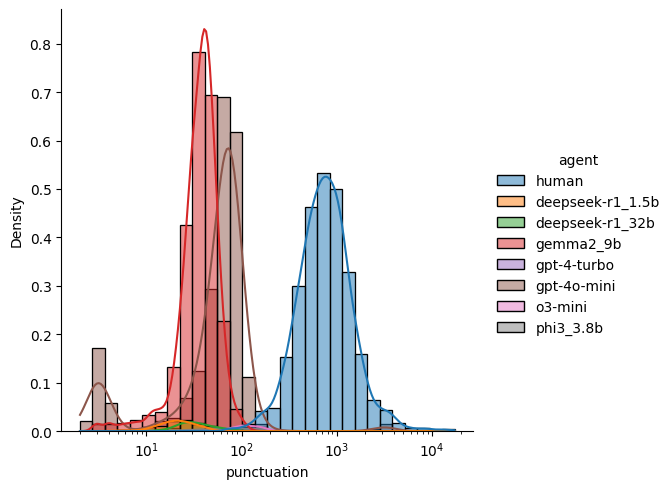

prismai-blog_authorship_corpus-fulltext.stats.jsonl 42925


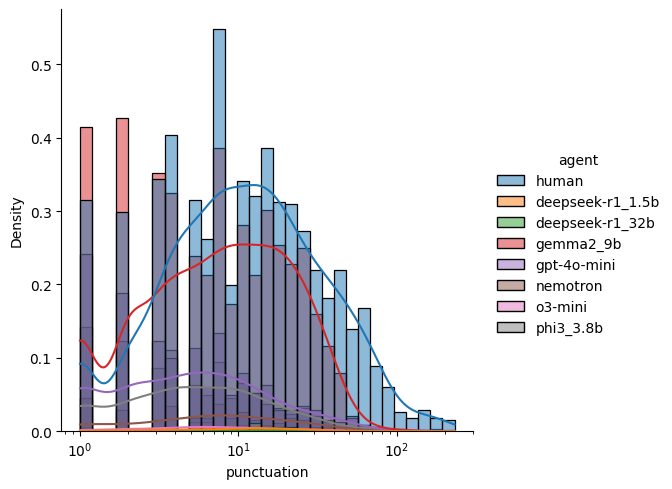

prismai-bundestag-fulltext.stats.jsonl 43238


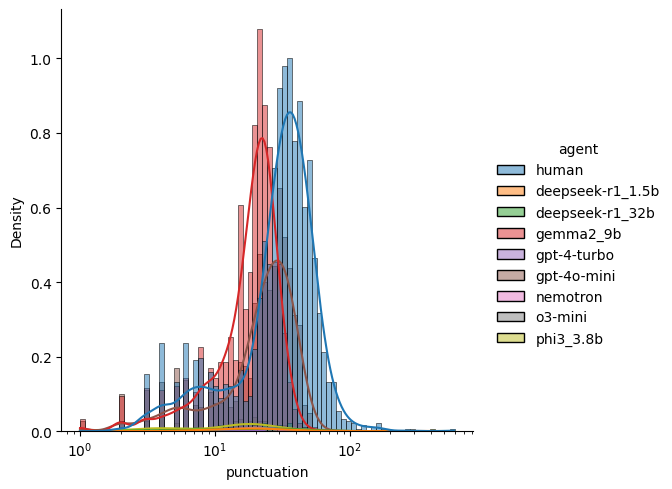

prismai-cnn_news-fulltext.stats.jsonl 45935


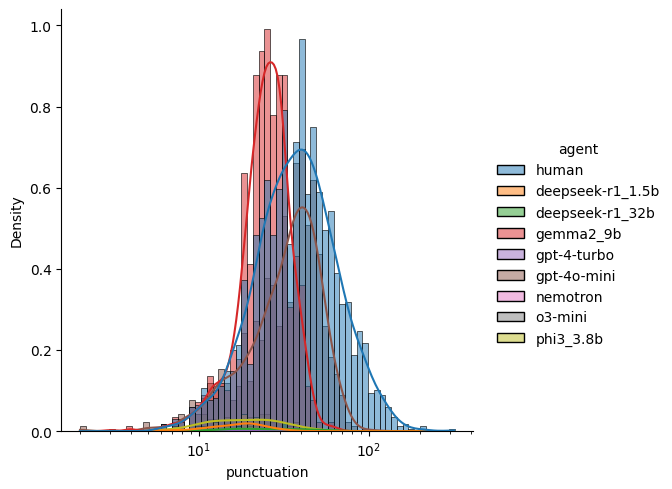

prismai-euro_court_cases-fulltext.stats.jsonl 23076


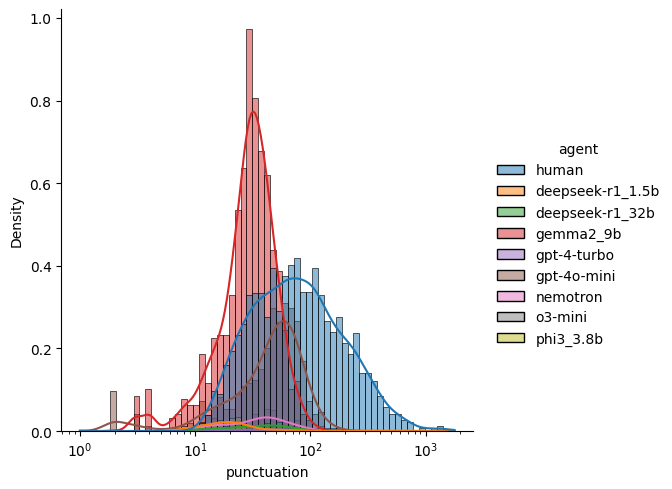

prismai-gutenberg_de-fulltext.stats.jsonl 831


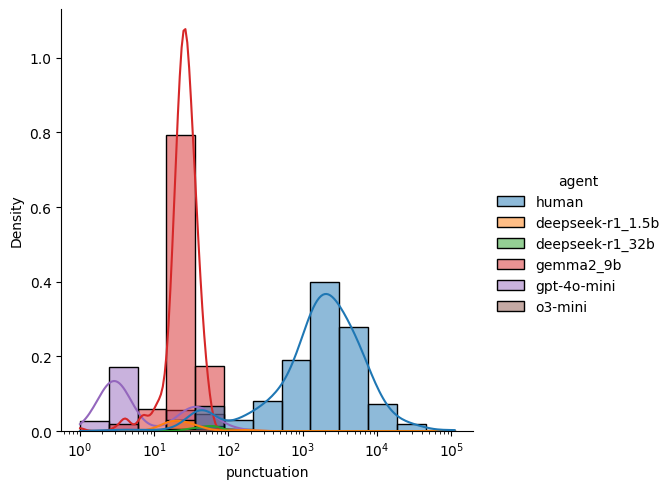

prismai-gutenberg_en-fulltext.stats.jsonl 15487


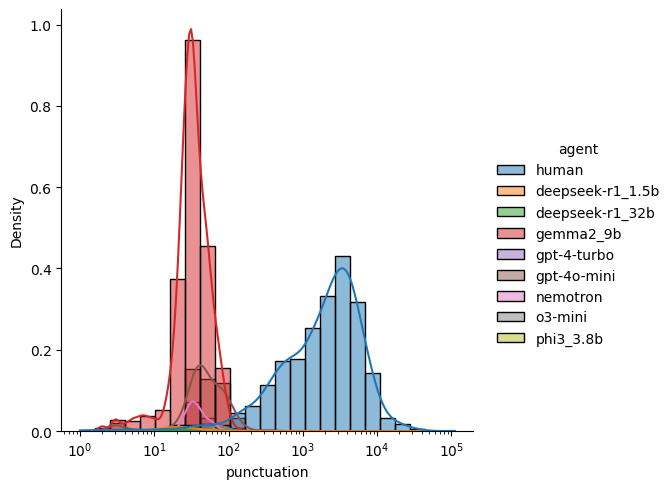

prismai-house_of_commons-fulltext.stats.jsonl 34008


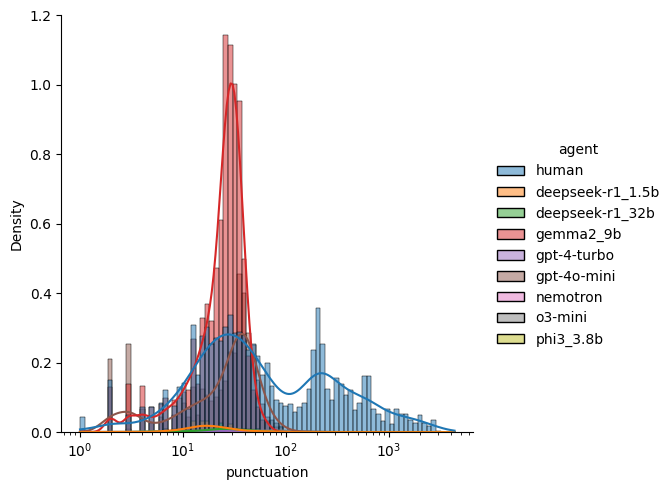

prismai-spiegel_articles-fulltext.stats.jsonl 44694


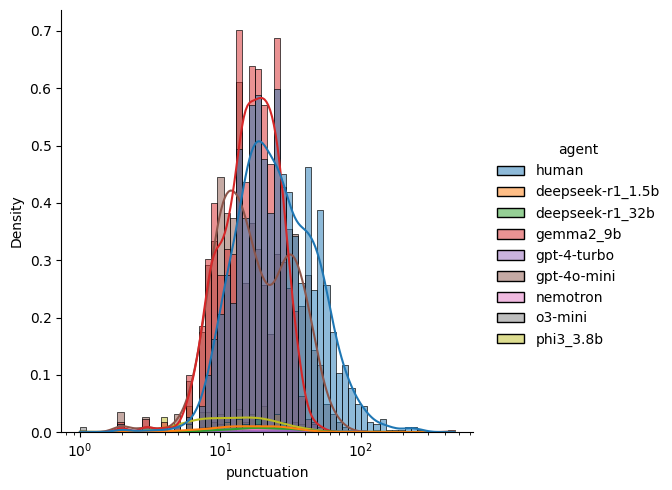

prismai-student_essays-fulltext.stats.jsonl 95788


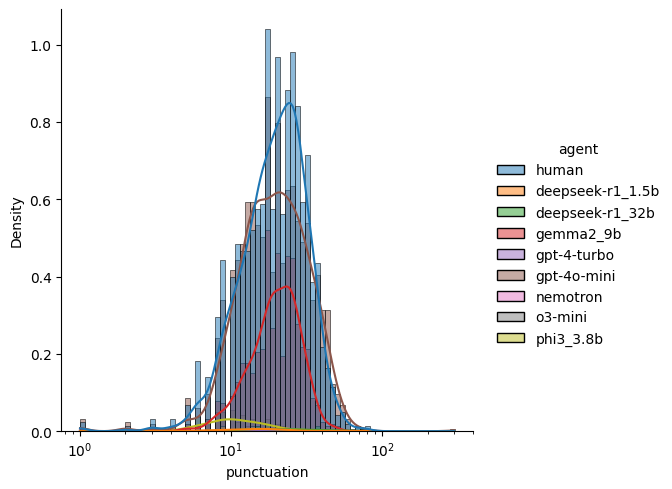

In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def plot(ds, key="punctuation"):
    if ds[key].min() == 0:
        ds[key] = ds[key] + 1

    hue_order = list(sorted(ds.index.unique()))
    hue_order.remove("human")
    hue_order.insert(0, "human")
    sns.displot(
        data=ds.sample(min(len(ds), 5000)),
        x=key,
        hue="agent",
        hue_order=hue_order,
        log_scale=True,
        kde=True,
        stat="density",
    )
    plt.show()


for path in list(sorted(Path("../data/prismai/stats").glob("*.jsonl.bz2"))):
    ds = pd.read_json(path, compression="bz2", lines=True).set_index("agent")
    print(path.stem, len(ds))
    plot(ds)